In [1]:
import pandas as pd
#import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.colors import to_hex
import seaborn as sns
import matplotlib.patches as mpatches
import re
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
#from brokenaxes import brokenaxes
import matplotlib.patches as mpatches
import os
import sys
import glob

from matplotlib import gridspec


In [ ]:
#sns.set_context("notebook", font_scale=1.5)

# plot settings
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 # or whatever size you want

# Set global font size for labels, titles and legends
#plt.rcParams['axes.labelsize'] = 26  # or whatever size you want
plt.rcParams['axes.titlesize'] = 24 # or whatever size you want
plt.rcParams['legend.fontsize'] = 22  # or whatever size you want
#plt.style.use(['ieee', 'no-latex', 'nature'])

## Complie results from COPASI simulations

#### Make sure to have the necessary files in the working directory

In [ ]:
# Define the directory path and the headers for the CSV files
# make sure to check you are in the correct directory
# Define the folder name as a separate variable
folder_name = "/100825_simulations"

folder_parts = folder_name.split('_')
if len(folder_parts) > 1:
    cell_line = folder_parts[1]  # Use the second part if it exists
else:
    cell_line = folder_parts[0]


# Construct the path using the folder name
path = f"/Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/sim_data/{folder_name}/output"
headers = ["param_index", "init_cond_index",
           "fos", "jun", "fra1", "fra2", "jund"]


# List all files in the directory
all_files = [f for f in os.listdir(path) if os.path.isfile(
    os.path.join(path, f)) and not f.startswith('.')]


# Ensure the path and files are correct
print(f"Total files found: {len(all_files)}")




Total files found: 100


In [14]:
all_files

['results_chunk_48_LHS_samples_10000.csv',
 'results_chunk_73_LHS_samples_10000.csv',
 'results_chunk_27_LHS_samples_10000.csv',
 'results_chunk_34_LHS_samples_10000.csv',
 'results_chunk_30_LHS_samples_10000.csv',
 'results_chunk_57_LHS_samples_10000.csv',
 'results_chunk_35_LHS_samples_10000.csv',
 'results_chunk_39_LHS_samples_10000.csv',
 'results_chunk_72_LHS_samples_10000.csv',
 'results_chunk_43_LHS_samples_10000.csv',
 'results_chunk_13_LHS_samples_10000.csv',
 'results_chunk_92_LHS_samples_10000.csv',
 'results_chunk_75_LHS_samples_10000.csv',
 'results_chunk_59_LHS_samples_10000.csv',
 'results_chunk_16_LHS_samples_10000.csv',
 'results_chunk_38_LHS_samples_10000.csv',
 'results_chunk_80_LHS_samples_10000.csv',
 'results_chunk_71_LHS_samples_10000.csv',
 'results_chunk_99_LHS_samples_10000.csv',
 'results_chunk_87_LHS_samples_10000.csv',
 'results_chunk_76_LHS_samples_10000.csv',
 'results_chunk_49_LHS_samples_10000.csv',
 'results_chunk_5_LHS_samples_10000.csv',
 'results_ch

In [ ]:
# this is for the output files
# Create an empty list to hold individual dataframes
dfs = []

# Loop through each file and read it into a dataframe
for file in all_files:
    full_path = os.path.join(path, file)

    # Check if the file is a CSV file
    if full_path.endswith('.csv'):
        # Use comma as the separator - CSV files have headers
        df = pd.read_csv(full_path, sep=',')

        # Print the first few rows to diagnose how it's being read
        # print(f"Reading file {file}...")
        # print(df.head())

        # Check if the shape of the dataframe matches the expected shape
        if df.shape[1] == len(headers):
            dfs.append(df)
        else:
            print(
                f"File {file} has unexpected number of columns: {df.shape[1]}")

# Ensure at least one file has been processed
if not dfs:
    print("No files were successfully processed.")
    exit()

# Concatenate all the dataframes together
final_df = pd.concat(dfs, ignore_index=True)

In [5]:
# import the input files
# Define the directory path and the headers for the CSV files
# make sure to check you are in the correct directory

path = f"/Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/sim_data/{folder_name}/input"

# Ignore files starting with '._'
all_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and not f.startswith('._')]

print(f"Total files found: {len(all_files)}")

# Create an empty list to hold individual dataframes
input_dfs = []

# Loop through each file and read it into a dataframe
for file in all_files:
    full_path = os.path.join(path, file)

    # Check if the file is a CSV file
    if full_path.endswith('.csv'):
        # Use comma as the separator and this have headers already

        df  = pd.read_csv(full_path, sep=',')
        #print(f"Reading file {file} with {df.shape[1]} columns...")
        input_dfs.append(df)
        # # Print the first few rows to diagnose how it's being read
        # print(f"Reading file {file}...")
        # print(df.head())

        # # Check if the shape of the dataframe matches the expected shape
        # if df.shape[1] == len(headers):
        #     df.columns = headers  # Add headers to the dataframe
        #     input_dfs.append(df)
        # else:
        #     print(
        #         f"File {file} has unexpected number of columns: {df.shape[1]}") 
            
# Ensure at least one file has been processed
if not input_dfs:
    print("No files were successfully processed.")
    exit()

# Concatenate all the dataframes together
input_df = pd.concat(input_dfs, ignore_index=True)



Total files found: 100


In [6]:
# Sort files by param_index
final_df = final_df.sort_values(by="param_index")
input_df = input_df.sort_values(by="param_index")


In [7]:
# import text file from 091323_sims folder
failed_file_name = 'failed_indices.txt'
path = f"/Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/sim_data/{folder_name}/"
failed_file = os.path.join(path, failed_file_name)
# Read the file
with open(failed_file, 'r') as f:
    failed_indices = f.readlines()

# Extract values using regex
data = []
pattern = r"param_index (\d+), init_cond_index (\d+)"
for line in failed_indices:
    match = re.search(pattern, line)
    if match:
        param_index, init_cond_index = match.groups()
        data.append((int(param_index), int(init_cond_index)))

# Convert to DataFrame
failed_df = pd.DataFrame(data, columns=['param_index', 'init_cond_index'])

print(failed_df)


       param_index  init_cond_index
0             1200                0
1            16400                0
2             1200                1
3             1200                2
4             1200                3
...            ...              ...
55573         7993              195
55574         7993              196
55575         7993              197
55576         7993              198
55577         7993              199

[55578 rows x 2 columns]


In [10]:
final_df


,param_index,init_cond_index,fos,jun,fra1,fra2,jund
1680044,0,1,0.7,0.5,0.6,9.0,1.0
1680172,0,129,0.7,0.5,0.6,9.0,1.0
1680173,0,130,0.7,0.5,0.6,9.0,1.0
1680174,0,131,0.7,0.5,0.6,9.0,1.0
1680175,0,132,0.7,0.5,0.6,9.0,1.0
...,...,...,...,...,...,...,...
600015,param_index,init_cond_index,fos,jun,fra1,fra2,jund
3400085,param_index,init_cond_index,fos,jun,fra1,fra2,jund
560014,param_index,init_cond_index,fos,jun,fra1,fra2,jund
480012,param_index,init_cond_index,fos,jun,fra1,fra2,jund


### Check failed simulations

In [ ]:
# Convert param_index and init_cond_index to int64 in both dataframes
final_df['param_index'] = final_df['param_index'].astype('int64')
final_df['init_cond_index'] = final_df['init_cond_index'].astype('int64')

input_df['param_index'] = input_df['param_index'].astype('int64')
input_df['init_cond_index'] = input_df['init_cond_index'].astype('int64')

# extract the failed indices from the final_df and input_df
fail_final_df = pd.merge(failed_df, final_df, on=[
                             'param_index', 'init_cond_index'], how='inner')

fail_input_df = pd.merge(
    failed_df, input_df, on=['param_index', 'init_cond_index'], how='inner')

print(fail_final_df)
print(fail_input_df)

In [87]:
# find unique parameteres in fail_final_df
len(fail_final_df['param_index'].unique())

529

In [88]:
def plot_distributions(dataframe, columns, title='Steady State Distribution'):
    """
    Plots the distributions of specified columns from a dataframe.

    Args:
    - dataframe (pd.DataFrame): Dataframe containing the data.
    - columns (list of str): List of column names in the dataframe to be plotted.
    - title (str): Main title for the plot. Default is 'Steady State Distribution'.
    """
    # Set up the figure and axes
    fig, axs = plt.subplots(len(columns), 1, figsize=(8, 15))

    for i, col in enumerate(columns):
        sns.histplot(dataframe[col], ax=axs[i],
                     kde=True, log_scale=True, bins=60, color='#28B463')
        axs[i].set_title(f'{col}')
        axs[i].set_xlabel(f'{col} (nM)')
        axs[i].set_ylabel('Frequency')

    # Set main title
    fig.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()


### Remove failed simulations

In [89]:
# List of param_index values to be removed
remove_param_indices = failed_df['param_index'].unique()

# Filter out rows from final_df that have a param_index in remove_param_indices
clean_final_df = final_df[~final_df['param_index'].isin(remove_param_indices)]

# Check the unique param_index values again
print(len(clean_final_df['param_index'].unique()))


39471


In [90]:

# get clean input_df data
clean_input_df = input_df[~input_df['param_index'].isin(remove_param_indices)]

# option to speed up export
# Round all float columns to 3 decimal places
float_columns = clean_input_df.select_dtypes(include=['float64', 'float32']).columns
clean_input_df[float_columns] = clean_input_df[float_columns].round(5)

# export clean_input_df to csv V3 is with less parameters but more initial conditions
clean_input_file_name = f'processed_simulations/{cell_line}_parameter_initial_condition_input_V4.csv'
clean_input_df.to_csv(clean_input_file_name, index=False)
print(f"Exported data to: {clean_input_file_name}")

/var/folders/8m/w_9fk48x5cb6tvnvzfhr9dnn2lj95t/T/ipykernel_27641/1018674656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_input_df[float_columns] = clean_input_df[float_columns].round(5)


Exported data to: processed_simulations/COLO858_parameter_initial_condition_input_V4.csv


In [91]:
print(clean_input_df.shape)
print(clean_input_df.memory_usage(deep=True).sum() / 1e6, "MB")

(5920650, 22)
1089.3996 MB


/Users/njr7jk/opt/anaconda3/envs/ap1_proj/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/njr7jk/opt/anaconda3/envs/ap1_proj/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/njr7jk/opt/anaconda3/envs/ap1_proj/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/njr7jk/opt/anaconda3/envs/ap1_proj/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

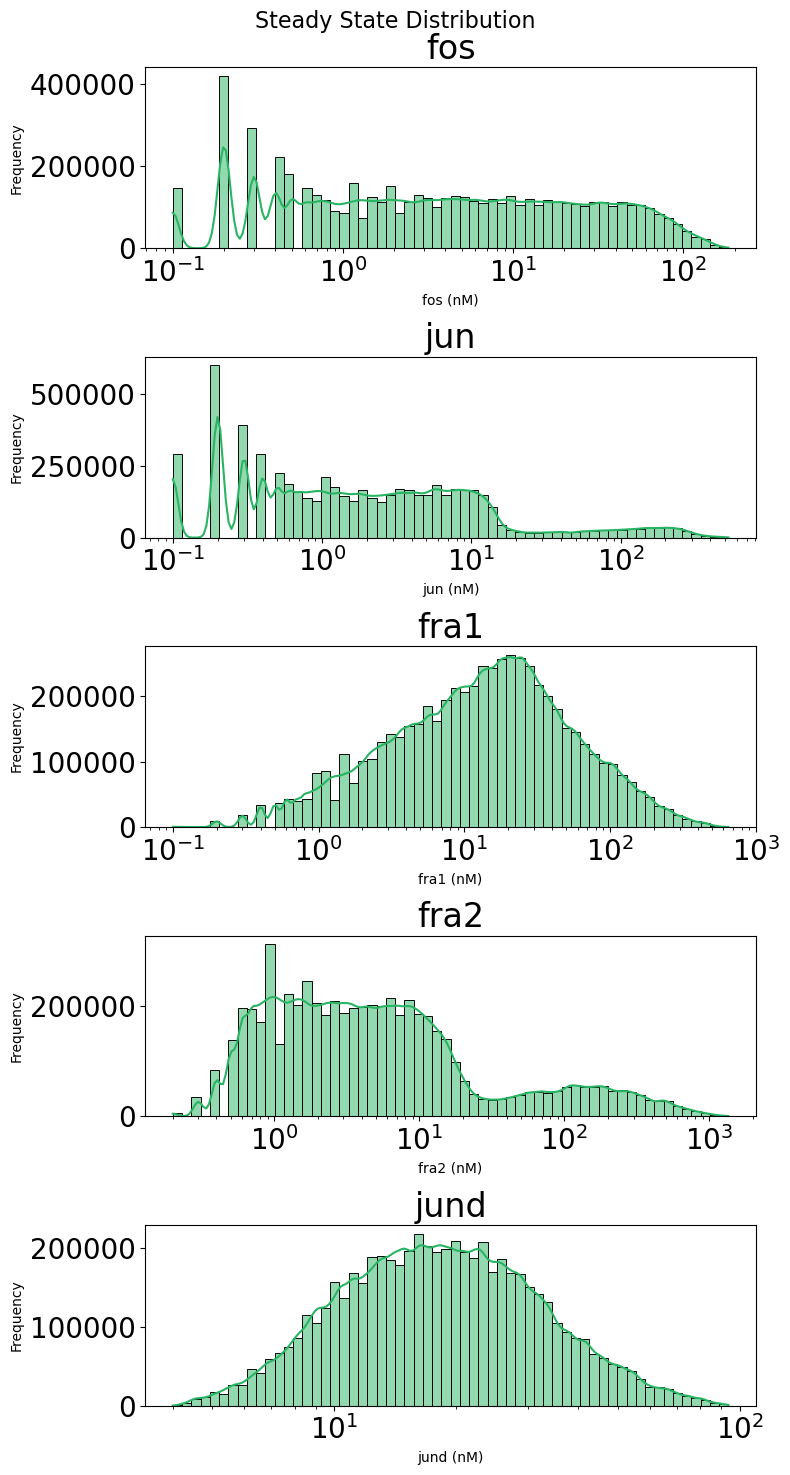

In [92]:
# plot distribution of steady state values for clean simulations
# List of columns to plot
columns = ['fos', 'jun', 'fra1', 'fra2', 'jund']
# Plot the distributions
plot_distributions(clean_final_df, columns, title='Steady State Distribution')

In [93]:
len(clean_final_df['param_index'].unique())


39471

In [94]:
# Group by 'param_index' and extract unique steady states
clean_final_df = clean_final_df.reset_index(drop=True)
#clean_final_df = clean_final_df.drop(columns=['unique_id'])
# drop unique index from clean_final_df

unique_steady_states = clean_final_df.groupby('param_index').apply(
    lambda x: x.drop(columns=['param_index', 'init_cond_index']).drop_duplicates())

# Reset the index for plotting
unique_steady_states = unique_steady_states.reset_index(drop=True)
unique_steady_states

/var/folders/8m/w_9fk48x5cb6tvnvzfhr9dnn2lj95t/T/ipykernel_27641/1482150235.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_steady_states = clean_final_df.groupby('param_index').apply(


,fos,jun,fra1,fra2,jund
0,70.7,8.9,14.7,559.5,27.2
1,101.4,2.0,25.1,11.4,5.9
2,9.3,1.0,47.0,2.2,18.5
3,2.7,5.6,50.9,0.8,21.6
4,0.4,0.6,1.8,5.2,19.2
...,...,...,...,...,...
40837,0.2,4.2,1.9,116.6,37.8
40838,1.5,9.4,91.8,2.4,16.3
40839,35.9,0.2,15.4,4.0,11.0
40840,33.0,1.6,49.6,0.6,6.7


In [ ]:
# unique_steady_states = clean_final_df.groupby('param_index').apply(lambda x: x.drop(
#     columns=['param_index', 'init_cond_index']).drop_duplicates())

# # Flatten the index
# unique_steady_states.reset_index(drop=True, inplace=True)

# # Log-scale the data for better visualization
# ss_df_logscaled = unique_steady_states.apply(np.log10)

# # Create the PairGrid and plot
# g2 = sns.PairGrid(ss_df_logscaled, diag_sharey=False)
# g2.map_diag(sns.kdeplot, lw=1, common_norm=False, fill=True)

# # Remove upper triangle
# for i, j in zip(*np.triu_indices_from(g2.axes, 1)):
#     g2.axes[i, j].remove()

# g2.map_lower(sns.kdeplot, levels=6, color="k", linewidths=1)

# plt.show()


### Threshold the simulaition results

In [ ]:
# Quick visuals of steady state values
# Prepare data for boxplot (excluding the index columns)
# df_melted = clean_final_df.melt(id_vars=['param_index', 'init_cond_index'],
#                     value_vars=['fos', 'jun', 'fra1', 'fra2', 'jund'],
#                     var_name='protein',
#                     value_name='value')

# # Plot
# plt.figure(figsize=(10, 6))
# sns.stripplot(x='value', y='protein', data=df_melted, color='#1487F1')

# # add a vertical line at 10 nM
# plt.axvline(x=10, color='red', linestyle='--')

# #plt.yscale('log')  # Use log scale due to wide range of values
# plt.xscale('log')
# plt.title("Steady state values")
# plt.ylabel("Protein")
# plt.xlabel("Concentration (nM)")
# plt.show()

In [ ]:
# threshold steady states >= 10 as modertate to high, <10 as low
protein_cols = ['fos', 'jun', 'fra1', 'fra2', 'jund']

def threshold(val):
    return 'high' if val >= 10 else 'low'

# Apply the threshold based on the fixed value of 10
state_df = pd.DataFrame()

for col in protein_cols:
    state_df[col] = clean_final_df[col].apply(threshold)

print(state_df)

          fos   jun  fra1  fra2  jund
0        high   low  high  high  high
1        high   low  high  high  high
2        high   low  high  high  high
3        high   low  high  high  high
4        high   low  high  high  high
...       ...   ...   ...   ...   ...
5920645   low  high  high   low  high
5920646   low  high  high   low  high
5920647   low  high  high   low  high
5920648   low  high  high   low  high
5920649   low  high  high   low  high

[5920650 rows x 5 columns]


In [96]:
# Create the 'state' column by joining the thresholded results with commas for clean_final_df
clean_final_df['state'] = state_df.apply(lambda row: ', '.join(row), axis=1)
clean_final_df.head()

,param_index,init_cond_index,fos,jun,fra1,fra2,jund,state
0,0,0,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
1,0,97,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
2,0,98,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
3,0,99,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
4,0,100,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"


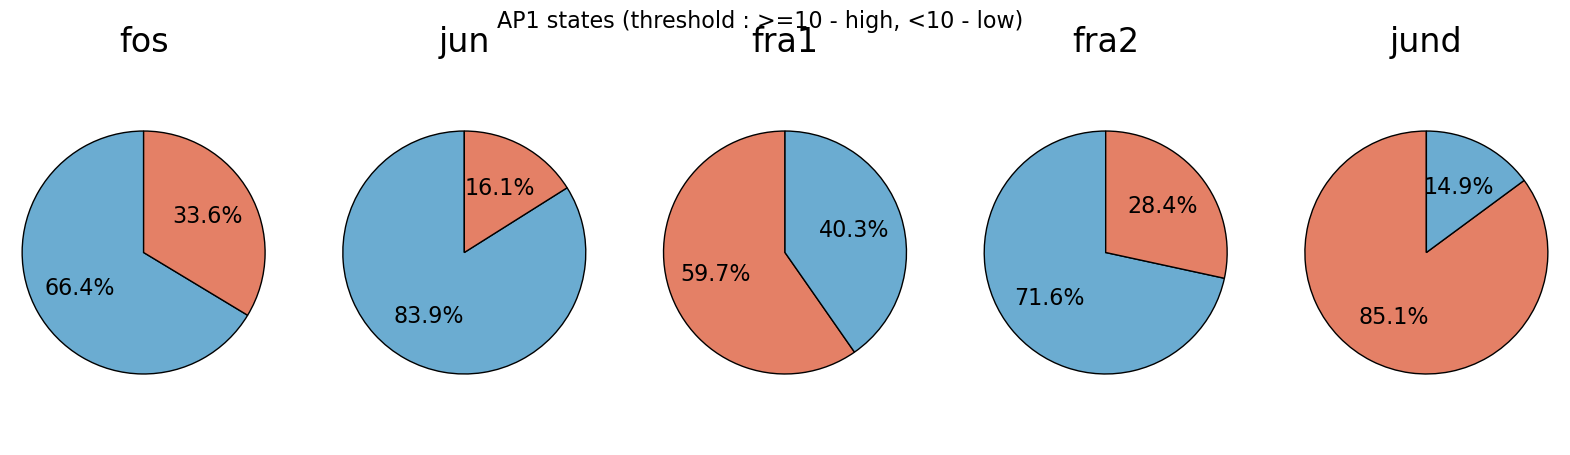

In [97]:
proteins = ['fos', 'jun', 'fra1', 'fra2', 'jund']
# Assuming df is your DataFrame
df = state_df

#Color map
color_palette = sns.color_palette("RdBu_r", 3)
color_map = [to_hex(color) for color in color_palette]
cmap = dict(zip(['low', 'medium', 'high'], color_map))
# Change figsize to your need
fig, axs = plt.subplots(1, len(proteins), figsize=(20, 5))

for ax, protein in zip(axs, proteins):
    exploded = df[protein].explode()
    counts = exploded.value_counts()
    labels = counts.index
    sizes = counts.values
    colors = [cmap[label] for label in labels]

    _, texts, autotexts = ax.pie(
        sizes, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='black'))

    # Make percent texts more visible and remove their labels from the pie
    for text in autotexts:
        text.set_color('black')
        text.set_fontsize(16)
    for text in texts:
        text.set_fontsize(0)  # Make label texts invisible

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')
    ax.set_title(protein)
# add a big title
fig.suptitle("AP1 states (threshold : >=10 - high, <10 - low)", fontsize=16)

# Create legend handles manually
# Create legend handles manually
# legend_handles = [Patch(facecolor=cmap[label],
#                         edgecolor='black', label=label) for label in cmap.keys()]
# # Add a legend
# fig.legend(handles=legend_handles, loc='upper right', edgecolor='black')
plt.show()


In [98]:
unique_states_counts = clean_final_df['state'].value_counts()
len(unique_states_counts)


32

In [99]:
clean_final_df

,param_index,init_cond_index,fos,jun,fra1,fra2,jund,state
0,0,0,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
1,0,97,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
2,0,98,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
3,0,99,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
4,0,100,70.7,8.9,14.7,559.5,27.2,"high, low, high, high, high"
...,...,...,...,...,...,...,...,...
5920645,39999,102,0.9,12.3,96.9,1.4,23.4,"low, high, high, low, high"
5920646,39999,101,0.9,12.3,96.9,1.4,23.4,"low, high, high, low, high"
5920647,39999,100,0.9,12.3,96.9,1.4,23.4,"low, high, high, low, high"
5920648,39999,98,0.9,12.3,96.9,1.4,23.4,"low, high, high, low, high"


/var/folders/8m/w_9fk48x5cb6tvnvzfhr9dnn2lj95t/T/ipykernel_27641/2577561879.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  state_protein_df = state_protein_df.replace({'low': 0, 'high': 1})


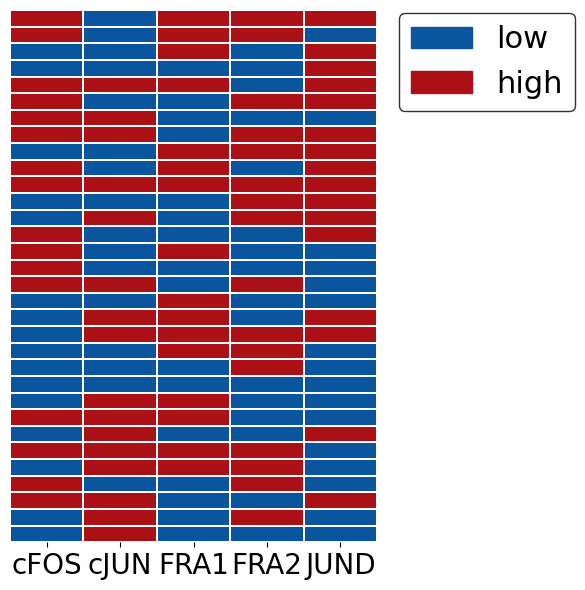

In [100]:
# ploheatmap of the states 
protein_cols = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND']
state_list = clean_final_df['state'].unique().tolist()
state_protein_list = []
for state in state_list:
    # Split the state into individual protein states
    protein_states = state.split(', ')

    # Add the protein states to the list
    state_protein_list.append(pd.Series(protein_states, index=protein_cols))

# Convert the list to a DataFrame
state_protein_df = pd.concat(state_protein_list, axis=1).T
# Use unique states as index
state_protein_df.index =state_list

# Define a custom color map
# cmap = {'low': 'low', 'medium': 'medium', 'high': 'high'}
cmap = {'low': 0, 'high': 1}
color_map = ListedColormap([sns.color_palette("Blues")[-1], sns.color_palette("Reds")[-1]])

# Convert the categorical data to numerical data
state_protein_df = state_protein_df.replace({'low': 0, 'high': 1})

# Create a heatmap of the DataFrame
plt.figure(figsize=(6, 6))
sns.heatmap(state_protein_df, cmap=color_map, cbar=False, linewidths=.01,linecolor= "white",square= False, yticklabels=False)
#plt.title(f'All possible Model Simulated states {len(state_protein_df)}')

# Create a custom legend
low_patch = mpatches.Patch(color=color_map(0), label='low')

high_patch = mpatches.Patch(color=color_map(2), label='high')
plt.legend(handles=[low_patch, high_patch],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, edgecolor='black')
plt.tight_layout()
plt.show()

#### Export clean final data to a csv file

In [101]:
#export clean_final_df to csv
clean_final_df.to_csv(f'processed_simulations/{cell_line}_simulations_V4_steadystates.csv', index=False)
